In [35]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy
import numpy as np
import cv2
import os

In [36]:
img=image.load_img("./train/bin/1 (245).jpg")

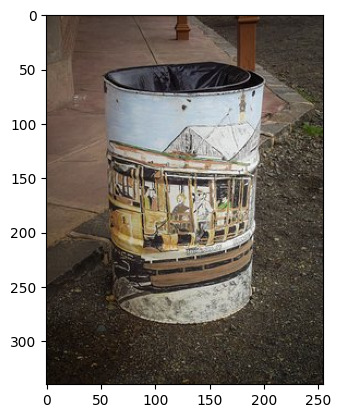

In [37]:
plt.imshow(img)

In [38]:
cv2.imread("./train/bin/1 (245).jpg").shape

(340, 255, 3)

In [39]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [40]:
train_dataset=train.flow_from_directory('./train/',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')
validation_dataset=validation.flow_from_directory('./validation/',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')


Found 224 images belonging to 2 classes.
Found 81 images belonging to 2 classes.


In [41]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])

In [42]:
model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [43]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs= 20,
                     validation_data= validation_dataset)

Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 27.0391 - accuracy: 0.3333 - val_loss: 2.2589 - val_accuracy: 0.4321
Epoch 2/20
3/3 [==============================] - 3s 1s/step - loss: 1.4762 - accuracy: 0.6667 - val_loss: 0.6921 - val_accuracy: 0.5679
Epoch 3/20
3/3 [==============================] - 4s 2s/step - loss: 1.6580 - accuracy: 0.6667 - val_loss: 1.1522 - val_accuracy: 0.4321
Epoch 4/20
3/3 [==============================] - 4s 2s/step - loss: 0.6688 - accuracy: 0.6250 - val_loss: 0.7757 - val_accuracy: 0.4444
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.7301 - accuracy: 0.4444 - val_loss: 0.6435 - val_accuracy: 0.6049
Epoch 6/20
3/3 [==============================] - 4s 2s/step - loss: 0.7045 - accuracy: 0.4444 - val_loss: 0.8829 - val_accuracy: 0.4321
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.9006 - accuracy: 0.2222 - val_loss: 0.6672 - val_accuracy: 0.5679
Epoch 8/20
3/3 [========================

In [44]:
validation_dataset.class_indices

{'bin': 0, 'bin_overflow': 1}

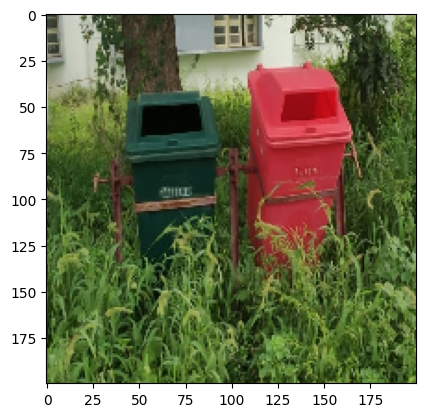

1/1 [==============================] - 0s 200ms/step
Dustbin is Overflowed


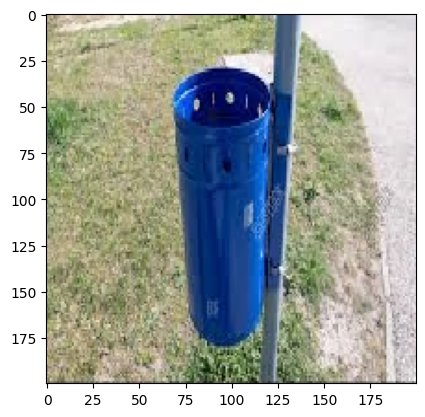

1/1 [==============================] - 0s 69ms/step
Dustbin is Overflowed


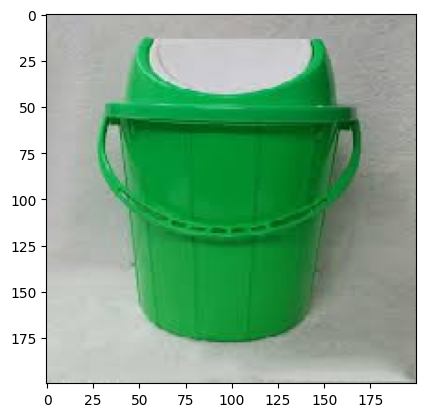

1/1 [==============================] - 0s 47ms/step
Dustbin is Not Overflowed


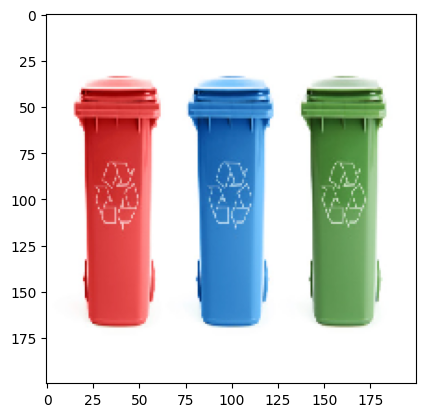

1/1 [==============================] - 0s 47ms/step
Dustbin is Overflowed


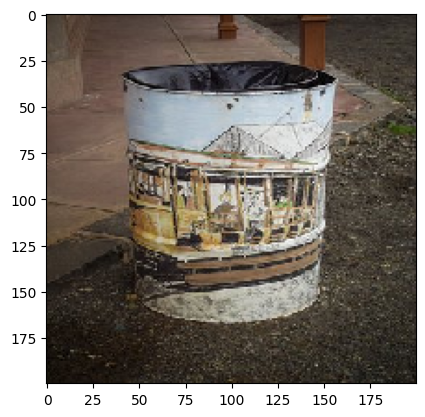

1/1 [==============================] - 0s 47ms/step
Dustbin is Overflowed


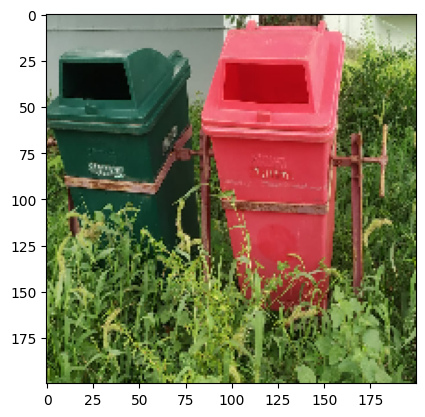

1/1 [==============================] - 0s 47ms/step
Dustbin is Overflowed


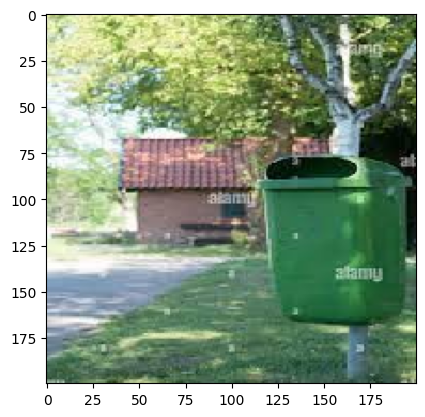

1/1 [==============================] - 0s 47ms/step
Dustbin is Overflowed


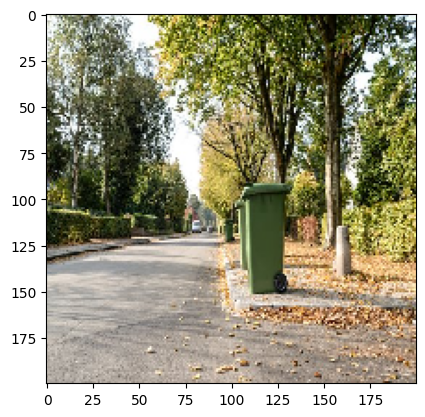

1/1 [==============================] - 0s 55ms/step
Dustbin is Overflowed


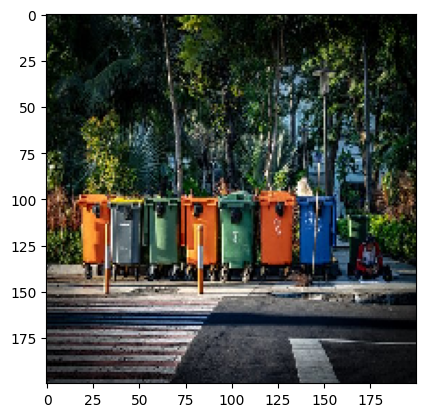

1/1 [==============================] - 0s 48ms/step
Dustbin is Not Overflowed


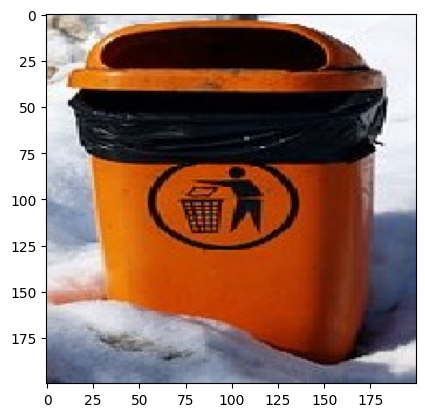

1/1 [==============================] - 0s 49ms/step
Dustbin is Overflowed


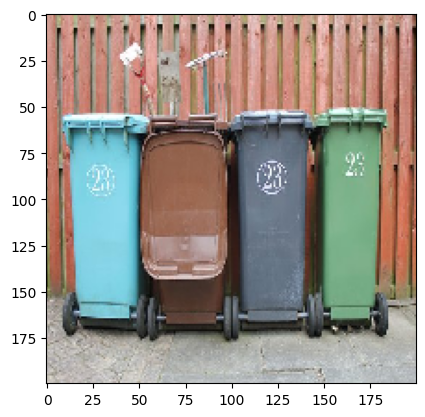

1/1 [==============================] - 0s 31ms/step
Dustbin is Overflowed


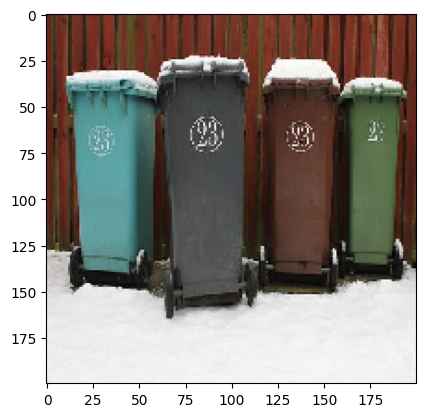

1/1 [==============================] - 0s 52ms/step
Dustbin is Overflowed


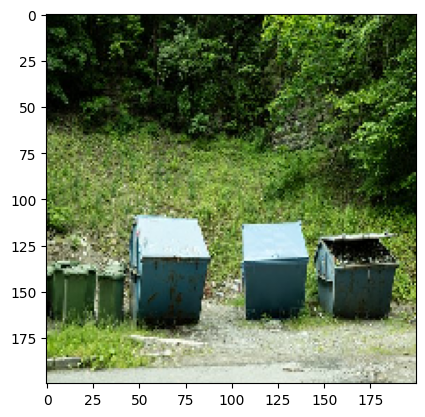

1/1 [==============================] - 0s 49ms/step
Dustbin is Overflowed


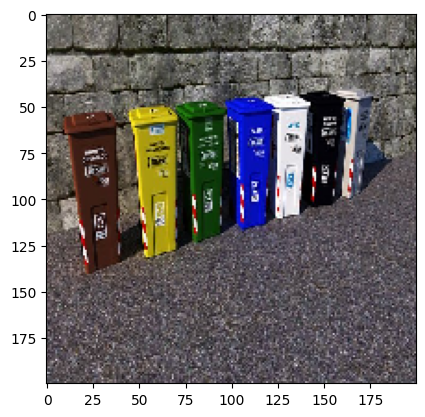

1/1 [==============================] - 0s 55ms/step
Dustbin is Overflowed


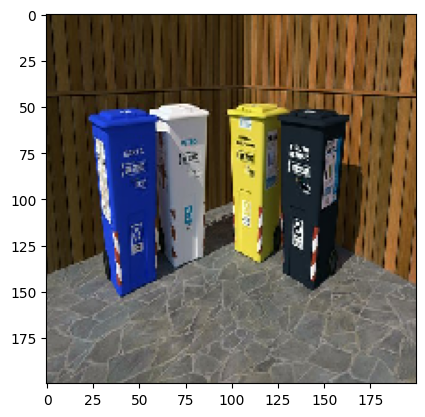

1/1 [==============================] - 0s 47ms/step
Dustbin is Overflowed


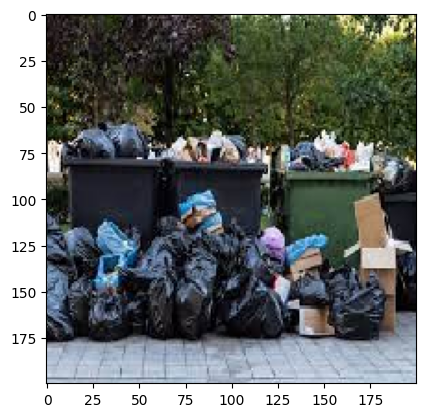

1/1 [==============================] - 0s 52ms/step
Dustbin is Overflowed


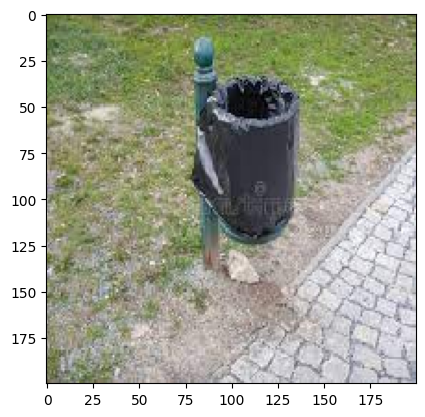

1/1 [==============================] - 0s 50ms/step
Dustbin is Overflowed


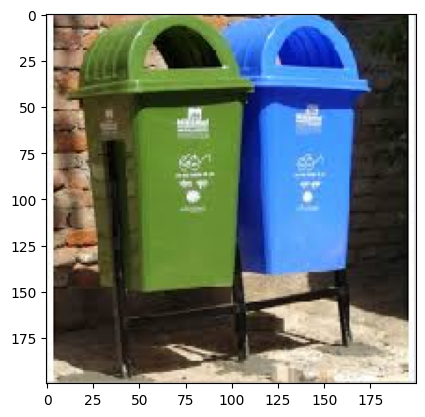

1/1 [==============================] - 0s 57ms/step
Dustbin is Not Overflowed


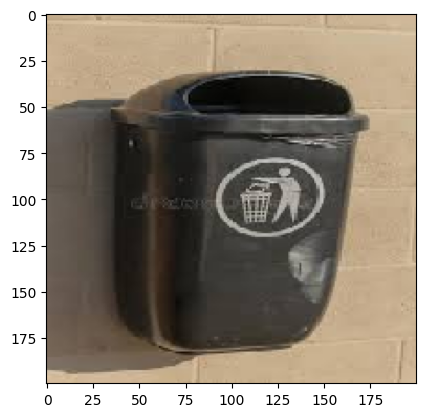

1/1 [==============================] - 0s 47ms/step
Dustbin is Overflowed


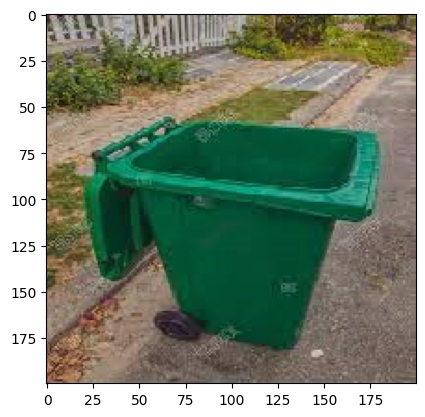

1/1 [==============================] - 0s 72ms/step
Dustbin is Overflowed


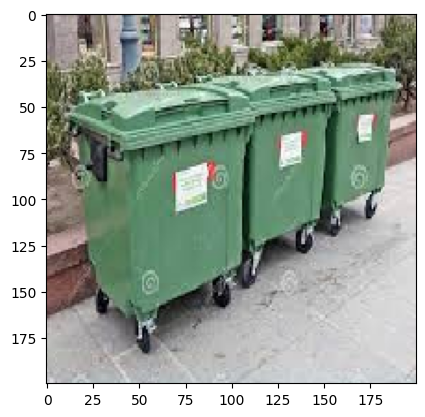

1/1 [==============================] - 0s 67ms/step
Dustbin is Overflowed


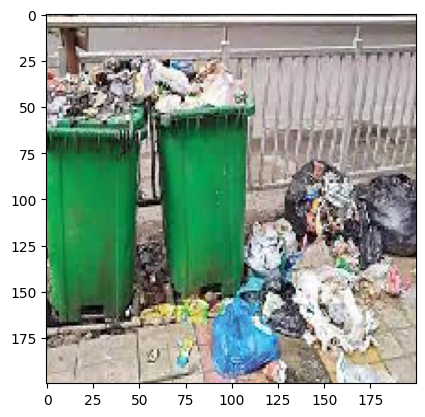

1/1 [==============================] - 0s 47ms/step
Dustbin is Overflowed


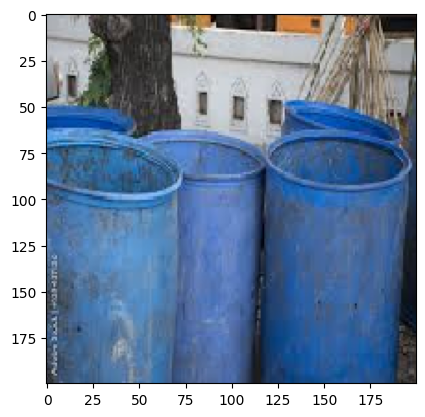

1/1 [==============================] - 0s 51ms/step
Dustbin is Overflowed


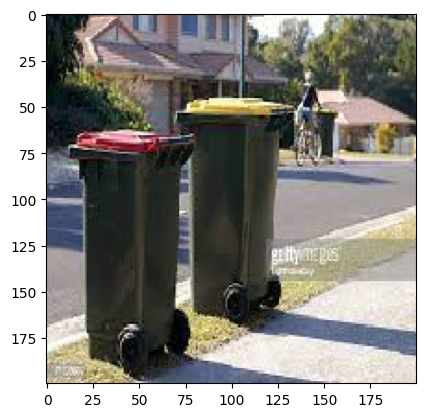

1/1 [==============================] - 0s 48ms/step
Dustbin is Overflowed


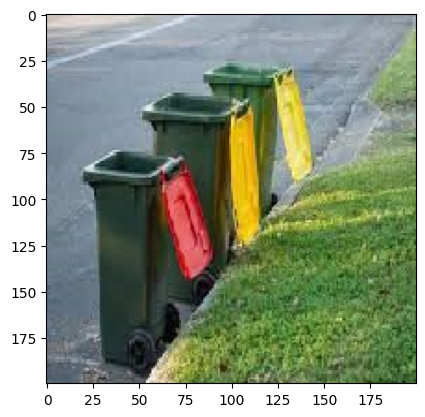

1/1 [==============================] - 0s 62ms/step
Dustbin is Overflowed


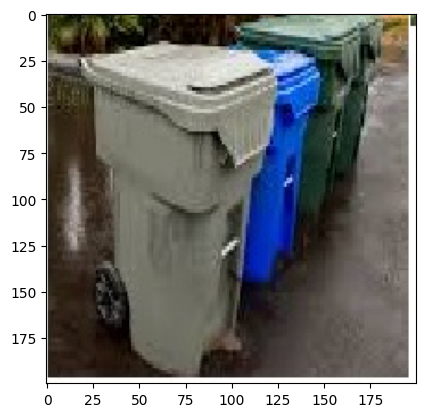

1/1 [==============================] - 0s 57ms/step
Dustbin is Overflowed


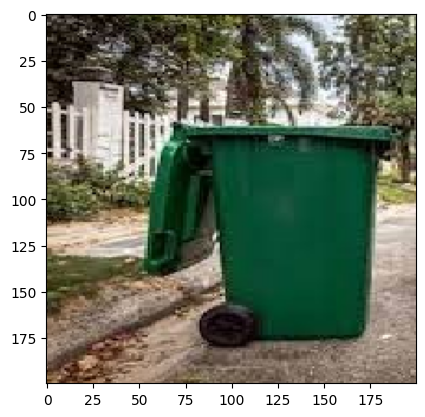

1/1 [==============================] - 0s 47ms/step
Dustbin is Overflowed


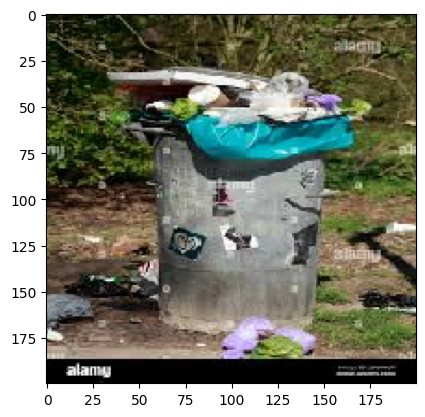

1/1 [==============================] - 0s 47ms/step
Dustbin is Overflowed


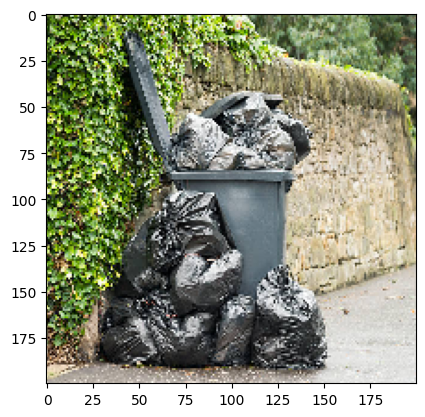

1/1 [==============================] - 0s 31ms/step
Dustbin is Overflowed


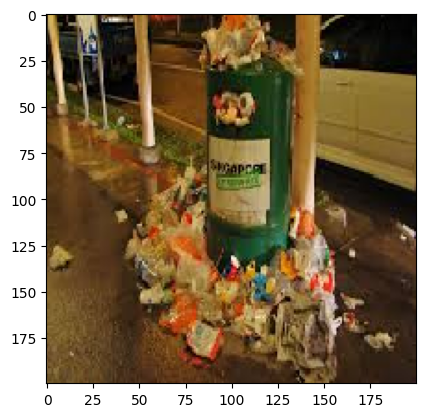

1/1 [==============================] - 0s 47ms/step
Dustbin is Overflowed


In [45]:
dir_path = './testing_images'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val= model.predict(images)
    if val == 0:
        print("Dustbin is Not Overflowed")
    else:
        print("Dustbin is Overflowed")